# Import Libraries

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

# Data Preprocessing

In [ ]:

def image_gen_w_aug(train_directory, valid_dir, test_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255,
                                      rotation_range = 30,  
                                      zoom_range = 0.2, 
                                      width_shift_range=0.1,  
                                      height_shift_range=0.1,
                                      validation_split = 0.15)

    valid_datagen = ImageDataGenerator(rescale=1/255,
                                      rotation_range = 30,  
                                      zoom_range = 0.2, 
                                      width_shift_range=0.1,  
                                      height_shift_range=0.1,
                                      validation_split = 0.15)
    
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_directory,
                                                       target_size = (75,75),
                                                       batch_size = 214,
                                                       class_mode = 'categorical')
    
    valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                          target_size = (75,75),
                                                          batch_size = 37,
                                                          class_mode = 'categorical')
    
    test_generator = test_datagen.flow_from_directory(test_directory,
                                                     target_size=(75,75),
                                                     batch_size = 37,
                                                     class_mode = 'categorical')
    
    return train_generator, valid_generator, test_generator


train_dir = os.path.join('./datasets/train/')
valid_dir = os.path.join('./datasets/validate/')
test_dir = os.path.join('./datasets/test/')

train_generator, validation_generator, test_generator = image_gen_w_aug(train_dir, valid_dir, test_dir)

Found 4148 images belonging to 3 classes.
Found 1788 images belonging to 3 classes.
Found 1785 images belonging to 3 classes.


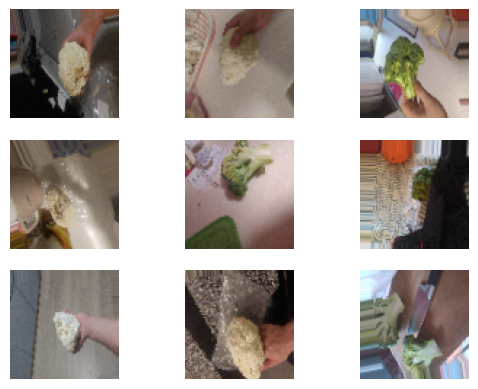

In [14]:
plt.figure()
for i in range(9):
    image = next(train_generator)[0][0]
    # image = np.squeeze(image)
    
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

In [15]:

num_classes = 3

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(75,75,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides =1))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten(input_shape=(75, 75, 3)))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Optimizer,
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 activation (Activation)     (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 73, 73, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 64)        18496     
                                                        

In [ ]:

history = model.fit(train_generator,
          batch_size=50,
          epochs=20,
          verbose=1,
          validation_data = validation_generator)

score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

tf.keras.models.save_model(model,'my_model.hdf5')

Found 3527 images belonging to 3 classes.
Found 621 images belonging to 3 classes.
Found 1785 images belonging to 3 classes.
Epoch 1/20
17/17 [==============================] - 528s 31s/step - loss: 1.1247 - accuracy: 0.4899 - val_loss: 0.8969 - val_accuracy: 0.4767
Epoch 2/20
17/17 [==============================] - 355s 21s/step - loss: 0.7853 - accuracy: 0.6796 - val_loss: 0.7691 - val_accuracy: 0.6618
Epoch 3/20
17/17 [==============================] - 393s 23s/step - loss: 0.5179 - accuracy: 0.8069 - val_loss: 0.5648 - val_accuracy: 0.7810
Epoch 4/20
17/17 [==============================] - 689s 42s/step - loss: 0.3672 - accuracy: 0.8679 - val_loss: 0.4903 - val_accuracy: 0.8406
Epoch 5/20
17/17 [==============================] - 408s 24s/step - loss: 0.2708 - accuracy: 0.8982 - val_loss: 0.4159 - val_accuracy: 0.8502
Epoch 6/20
17/17 [==============================] - 464s 27s/step - loss: 0.2313 - accuracy: 0.9195 - val_loss: 0.3700 - val_accuracy: 0.8744
Epoch 7/20
17/17 [=====

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

AttributeError: 'History' object has no attribute 'keys'